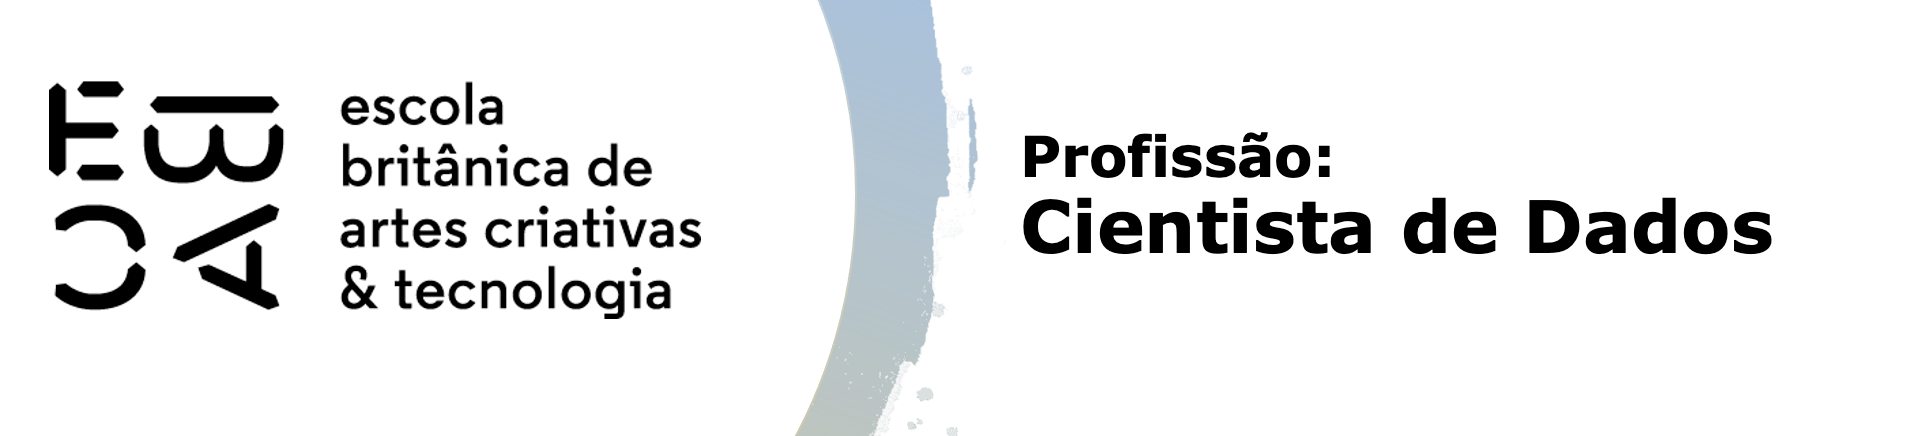

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 33** | Inferência | Exercício I

**Aluno:** [Marcio da Silva](https://www.linkedin.com/in/marcio-d-silva/)<br>
**Data:** 18 de outubro de 2024.

---


# Tarefa

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from statsmodels.stats.weightstats import ttest_ind

In [32]:
pg = sns.load_dataset('penguins')

In [36]:
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


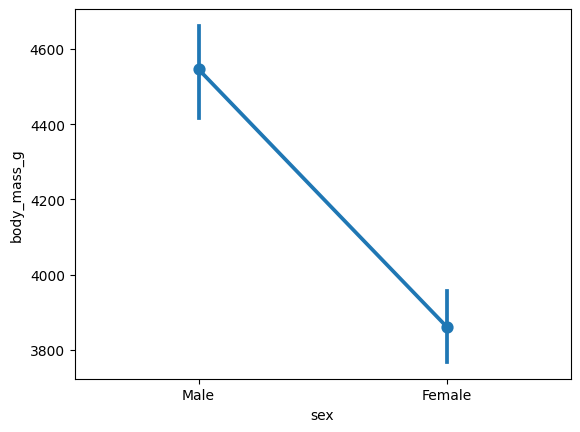

In [5]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g');

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [42]:
# Definição das hipóteses nula e alternativa
print('''
Hipótese nula       H0: Peso dos machos <= Peso das fêmeas
Hipótese alternativa H1: Peso dos machos >  Peso das fêmeas''')

# Cálculo das estatísticas para machos e fêmeas
def calcular_estatisticas(pg, sexo):
    amostras = pg.loc[pg['sex'] == sexo, 'body_mass_g']
    n = len(amostras)
    media = amostras.mean()
    std = amostras.std(ddof=1)
    return n, media, std

# Obter estatísticas para machos e fêmeas
n_male, mean_male, std_male = calcular_estatisticas(pg, 'Male')
n_female, mean_female, std_female = calcular_estatisticas(pg, 'Female')

# Cálculo da diferença entre as médias e erro padrão
mean_difference = mean_male - mean_female
std_error = np.sqrt((std_male**2 / n_male) + (std_female**2 / n_female))

# Estatística t e graus de liberdade
t_statistic = mean_difference / std_error
df = n_male + n_female - 2

# Valor crítico do teste t para um intervalo de confiança de 95%
alpha = 0.05
t_critical = stats.t.ppf(q=1 - alpha, df=df)

# Cálculo do p-valor
p_value = 1 - stats.t.cdf(t_statistic, df=df)

# Apresentação dos resultados
print(f'''
Resultados:

Diferença entre as médias: {mean_difference:.2f}
Desvio padrão (Macho): {std_male:.2f}
Desvio padrão (Fêmea): {std_female:.2f}
Erro padrão: {std_error:.2f}
Estatística do teste t: {t_statistic:.2f}
Graus de liberdade: {df}
Valor crítico (t crítico): {t_critical:.2f}
P-valor: {p_value:.5f}
''')

# Interpretação dos resultados
if t_statistic > t_critical:
    print("Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o das fêmeas.")
else:
    print("Não rejeitar a hipótese nula. Não há evidências suficientes para rejeitar a hipótese nula.")



Hipótese nula       H0: Peso dos machos <= Peso das fêmeas
Hipótese alternativa H1: Peso dos machos >  Peso das fêmeas

Resultados:

Diferença entre as médias: 683.41
Desvio padrão (Macho): 787.63
Desvio padrão (Fêmea): 666.17
Erro padrão: 79.89
Estatística do teste t: 8.55
Graus de liberdade: 331
Valor crítico (t crítico): 1.65
P-valor: 0.00000

Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o das fêmeas.


In [43]:
# Utilizando statsmodels.stats.weightstats.ttest_ind
# Dados para o teste
x1 = pg.loc[pg['sex'] == 'Male', 'body_mass_g']
x2 = pg.loc[pg['sex'] == 'Female', 'body_mass_g']

# Teste t
t_statistic, p_value, degrees_of_freedom = ttest_ind(x1, x2, alternative='larger', usevar='unequal')

# Apresentação dos resultados
print("Resultados:\n")

print(f"Estatística do teste t: {t_statistic:.5f}")
print(f"P-valor: {p_value:.5f}")
print(f"Grau de liberdade: {degrees_of_freedom:.0f}")

# Interpretação dos resultados
if p_value < 0.05:
    print("\nRejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o das fêmeas.")
else:
    print("\nNão há evidências suficientes para rejeitar a hipótese nula. Não há diferença significativa no peso entre machos e fêmeas.")

Resultados:

Estatística do teste t: 8.55454
P-valor: 0.00000
Grau de liberdade: 324

Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o das fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

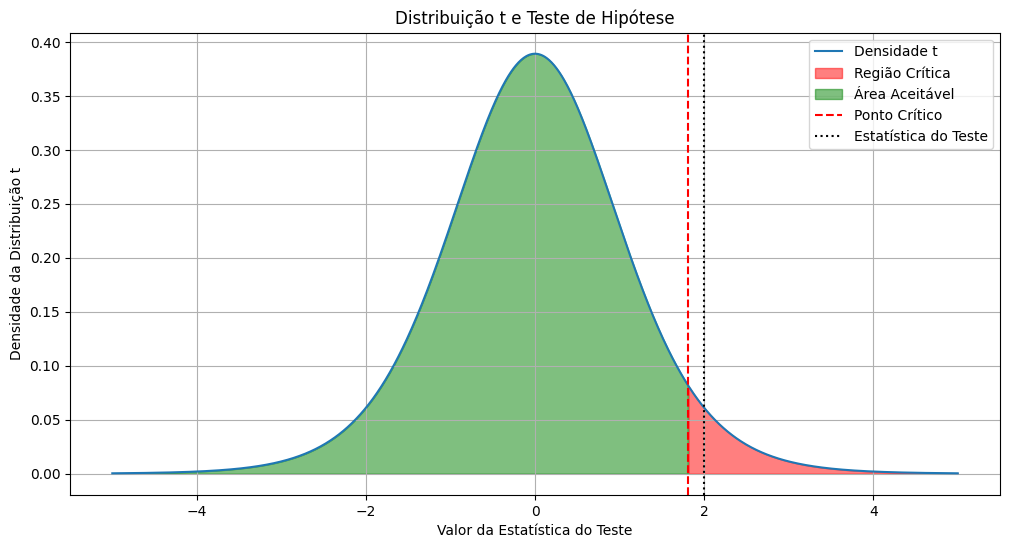

A probabilidade de valores na região crítica é de 5,00%


In [44]:
# Configurações do gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Parâmetros da distribuição t
df = 10  # Substitua pelo grau de liberdade calculado
t_statistic = 2.0  # Substitua pela estatística do teste calculada
t_critical = stats.t.ppf(0.95, df)

# Valores para plotar a densidade da distribuição t
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df)

# Gráfico da densidade
ax.plot(x, y, label='Densidade t')

# Região Crítica
ax.fill_between(x, y, where=(x > t_critical), color='red', alpha=0.5, label='Região Crítica')

# Área aceitável
ax.fill_between(x, y, where=(x <= t_critical), color='green', alpha=0.5, label='Área Aceitável')

# Linhas verticais para as estatísticas
ax.axvline(x=t_critical, color='r', linestyle='--', label='Ponto Crítico')
ax.axvline(x=t_statistic, color='black', linestyle=':', label='Estatística do Teste')

# Ajustar eixos
ax.set_title('Distribuição t e Teste de Hipótese')
ax.set_xlabel('Valor da Estatística do Teste')
ax.set_ylabel('Densidade da Distribuição t')
ax.legend()

plt.grid()
plt.show()

# Cálculo da probabilidade para a região crítica
prob_area = 1 - stats.t.cdf(t_critical, df)
print(f'A probabilidade de valores na região crítica é de {prob_area:.2%}'.replace('.', ','))

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [45]:
# Iteração sobre as espécies únicas
for specie in pg.species.unique():
    print(f'Espécie: {specie}\n')

    # Dados para machos e fêmeas
    male = pg.loc[(pg.sex == 'Male') & (pg.species == specie), 'body_mass_g']
    female = pg.loc[(pg.sex == 'Female') & (pg.species == specie), 'body_mass_g']

    # Estatísticas
    n_male, n_female = len(male), len(female)
    if n_male == 0 or n_female == 0:
        print(f"A espécie {specie} não tem dados suficientes.\n")
        continue  # Pular para a próxima espécie

    mean_male, mean_female = np.mean(male), np.mean(female)
    std_male, std_female = np.std(male, ddof=1), np.std(female, ddof=1)

    # Cálculo das estatísticas do teste
    mean_difference = mean_male - mean_female
    std_error = np.sqrt((std_male**2 / n_male) + (std_female**2 / n_female))
    t_statistic = mean_difference / std_error
    df = n_male + n_female - 2
    alpha = 0.05
    t_critical = stats.t.ppf(1 - alpha, df)
    p_value = 1 - stats.t.cdf(t_statistic, df)

    # Resultados
    print(f'''
    Resultados:
    Diferença entre as médias: {mean_difference:.2f}
    Desvio padrão (Machos): {std_male:.2f}
    Desvio padrão (Fêmeas): {std_female:.2f}
    Erro padrão: {std_error:.2f}
    Estatística do teste: {t_statistic:.2f}
    Graus de liberdade: {df}
    Valor crítico: {t_critical:.2f}
    P-value: {p_value:.5f}
    ''')

    # Interpretação dos resultados
    if p_value < alpha:
        print(f"Rejeitar a hipótese nula. O peso dos machos da espécie {specie} é significativamente maior que o das fêmeas.\n")
    else:
        print(f"Não há evidências suficientes para rejeitar a hipótese nula. Não há diferença significativa no peso entre machos e fêmeas da espécie {specie}.\n")


Espécie: Adelie


    Resultados:
    Diferença entre as médias: 674.66
    Desvio padrão (Machos): 346.81
    Desvio padrão (Fêmeas): 269.38
    Erro padrão: 51.40
    Estatística do teste: 13.13
    Graus de liberdade: 144
    Valor crítico: 1.66
    P-value: 0.00000
    
Rejeitar a hipótese nula. O peso dos machos da espécie Adelie é significativamente maior que o das fêmeas.

Espécie: Chinstrap


    Resultados:
    Diferença entre as médias: 411.76
    Desvio padrão (Machos): 362.14
    Desvio padrão (Fêmeas): 285.33
    Erro padrão: 79.07
    Estatística do teste: 5.21
    Graus de liberdade: 66
    Valor crítico: 1.67
    P-value: 0.00000
    
Rejeitar a hipótese nula. O peso dos machos da espécie Chinstrap é significativamente maior que o das fêmeas.

Espécie: Gentoo


    Resultados:
    Diferença entre as médias: 805.09
    Desvio padrão (Machos): 313.16
    Desvio padrão (Fêmeas): 281.58
    Erro padrão: 54.54
    Estatística do teste: 14.76
    Graus de liberdade: 117
    V

In [46]:
# Iteração sobre as espécies únicas
for specie in pg.species.unique():
    # Dados por espécie
    x1 = pg.loc[(pg['species'] == specie) & (pg['sex'] == 'Male'), 'body_mass_g']
    x2 = pg.loc[(pg['species'] == specie) & (pg['sex'] == 'Female'), 'body_mass_g']

    # Teste t
    t_statistic, p_value, degrees_of_freedom = ttest_ind(x1, x2, alternative='larger', usevar='unequal')

    # Apresentação dos resultados
    print(f"\tResultados para a espécie {specie}:\n")
    print(f"Estatística do teste: {t_statistic:.18f}")
    print(f"P-valor do teste t: {p_value:.18f}")
    print(f"Grau de liberdade usado no teste t: {degrees_of_freedom:.18f}")

    # Interpretação dos resultados
    if p_value < 0.05:
        print("Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.\n")
    else:
        print("Não há evidências suficientes para rejeitar a hipótese nula. Não há diferença significativa no peso entre machos e fêmeas.\n")


	Resultados para a espécie Adelie:

Estatística do teste: 13.126285923485873752
P-valor do teste t: 0.000000000000000000
Grau de liberdade usado no teste t: 135.693578935303804656
Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.

	Resultados para a espécie Chinstrap:

Estatística do teste: 5.207733848992660342
P-valor do teste t: 0.000001132215775733
Grau de liberdade usado no teste t: 62.575105077219298266
Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.

	Resultados para a espécie Gentoo:

Estatística do teste: 14.761368414543291294
P-valor do teste t: 0.000000000000000000
Grau de liberdade usado no teste t: 116.643503775125893185
Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.

